In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import yfinance as yf
import dash
from dash import dcc
from dash import html
import matplotlib.pyplot as plt

## Importing the data

In [2]:
df_apex = pd.read_excel('apex_enterprise.xlsx', header=[0,1], index_col=0)

In [3]:
df_apex

Tickers       ESG       Environmental       Social       Governance   
Ticker  ESG Score Environmental Score Social Score Governance Score   
A        0.561338            0.692929     0.123596         0.384615  \
AAL      0.591078            0.549495     0.724719         0.338462   
AAP      0.154895            0.074747     0.505618         0.038462   
AAPL     0.334572            0.303030     0.432584         0.211538   
ABC      0.674102            0.696970     0.623596         0.384615   
ABT      0.753408            0.636364     0.848315         0.592308   
ACN      0.759603            0.737374     0.646067         0.557692   
ADBE     0.084263            0.080808     0.000000         0.153846   
ADI      0.672862            0.652525     0.640449         0.453846   
ADM      0.726146            0.729293     0.713483         0.423077   
AEE      0.597274            0.505051     0.707865         0.453846   
AFL      0.556382            0.595960     0.539326         0.269231   
AIG      0.676580            0.672727     0.623596         0.438462   
AIZ      0.593556            0.595960     0.539326         0.384615   
AJG      0.692689            0.626263     0.792135         0.461538   
AKAM     0.863693            0.838384     0.808989         0.576923   
ALB      0.690211            0.672727     0.735955         0.403846   
ALGN     0.179678            0.090909     0.348315         0.192308   
ALK      0.619579            0.646465     0.556180         0.357692   
AMAT     0.602230            0.610101     0.539326         0.384615   
AMD      0.000000            0.010101     0.039326         0.000000   
AME      0.686493            0.686869     0.707865         0.384615   
AMGN     0.670384            0.656566     0.662921         0.423077   
AMP      0.604709            0.616162     0.662921         0.296154   
AMT      0.635688            0.626263     0.617978         0.403846   
AMZN     1.000000            0.919192     0.584270         1.000000   
ANSS     0.736059            0.737374     0.735955         0.423077   
AOS      0.665428            0.652525     0.651685         0.423077   
APD      0.949195            1.000000     1.000000         0.403846   
APH      0.662949            0.626263     0.685393         0.442308   
ARE      0.675341            0.672727     0.696629         0.384615   
ATVI     0.415118            0.161616     0.769663         0.500000   
AXP      0.022305            0.000000     0.140449         0.019231   
BG       0.517968            0.573737     0.202247         0.423077   
BMY      0.674102            0.656566     0.707865         0.403846   
CDNS     0.726146            0.707071     0.606742         0.538462   
CHRW     0.614622            0.606061     0.550562         0.423077   
COF      0.707559            0.757576     0.550562         0.423077   
CPB      0.804213            0.781818     0.820225         0.492308   
GOOG     0.299876            0.060606     0.612360         0.442308   
LNT      0.671623            0.612121     0.735955         0.461538   
MMM      0.659232            0.630303     0.713483         0.403846   
MO       0.600991            0.606061     0.544944         0.384615   

Tickers           Adj Close                                           
Ticker  2009-12-31 00:00:00 2010-12-31 00:00:00 2011-12-31 00:00:00   
A                 20.119406           26.828028           22.618950  \
AAL                4.562868            9.436842            4.779699   
AAP               36.794765           60.397594           63.816147   
AAPL               6.396730            9.791340           12.293816   
ABC               21.311470           28.214741           31.121115   
ABT               19.169523           17.584419           21.413647   
ACN               32.265007           38.408360           43.014595   
ADBE              36.779999           30.780001           28.270000   
ADI               22.895514           28.092331           27.414339   
ADM               22.14

In [4]:
df_bloomberg = pd.read_excel('bloomberg.xlsx', header=[0,1], index_col=0)

## Showcasing the difference in ESG scores between the data from Apex Enterprise and Bloomberg

In [5]:
df_apex.index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       'AEE', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'AMAT',
       'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'AOS', 'APD', 'APH',
       'ARE', 'ATVI', 'AXP', 'BG', 'BMY', 'CDNS', 'CHRW', 'COF', 'CPB', 'GOOG',
       'LNT', 'MMM', 'MO'],
      dtype='object')

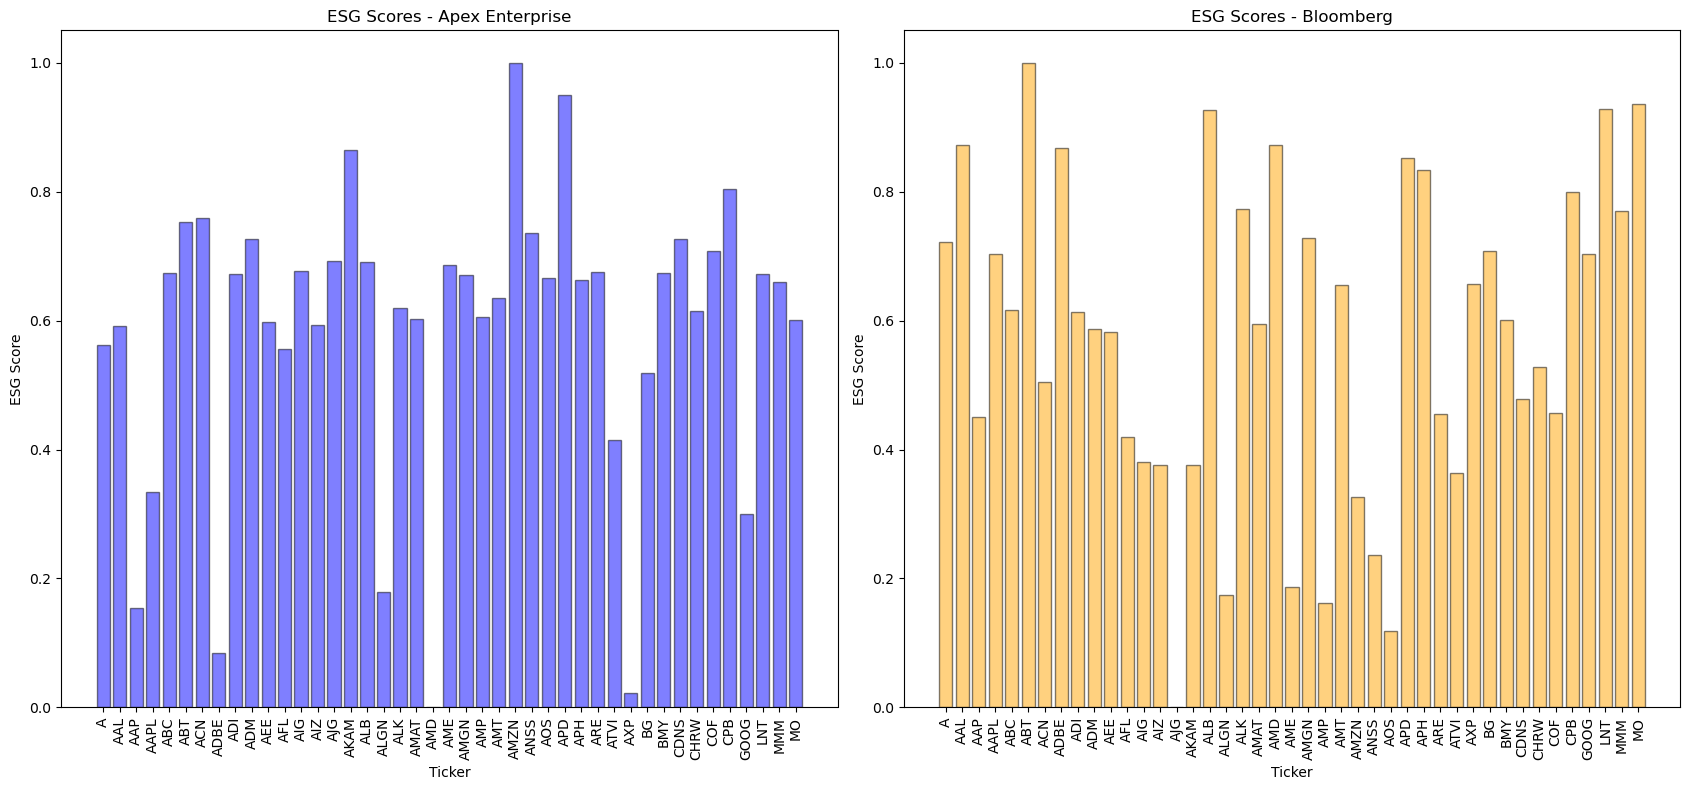

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))

# Apex histogram
ax1.bar(df_apex.index, df_apex['ESG']['ESG Score'], color='blue', alpha=0.5, edgecolor='black')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('ESG Score')
ax1.set_title('ESG Scores - Apex Enterprise')
ax1.set_xticks(range(len(df_apex)))
ax1.set_xticklabels(df_apex.index, rotation='vertical')

# Bloomberg histogram
ax2.bar(df_bloomberg.index, df_bloomberg['ESG']['ESG Score'], color='orange', alpha=0.5, edgecolor='black')
ax2.set_xlabel('Ticker')
ax2.set_ylabel('ESG Score')
ax2.set_title('ESG Scores - Bloomberg')
ax2.set_xticks(range(len(df_bloomberg)))
ax2.set_xticklabels(df_bloomberg.index, rotation='vertical')

plt.tight_layout()
plt.show()

## Log returns

In [7]:
import log_return
log_re_apex = log_return.log_returns(df_apex['Adj Close'])
log_re_bloomberg = log_return.log_returns(df_bloomberg['Adj Close'])

In [8]:
from fetch_score import get_scores
esg_np_apex, e_np_apex, s_np_apex, g_np_apex = get_scores(df_apex)
esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg = get_scores(df_bloomberg)

In [9]:
# Assuming your DataFrame is already defined as 'df'

# Convert index to datetime
log_re_apex.index = pd.to_datetime(log_re_apex.index)

# Create a line plot for each ticker
fig = go.Figure()

for column in log_re_apex.columns:
    fig.add_trace(go.Scatter(x=log_re_apex.index, y=log_re_apex[column], name=column, mode='lines'))

# Set the x-axis and y-axis labels and the plot title
fig.update_layout(
    title='Logarithmic Stock Returns',
    xaxis_title='Year',
    yaxis_title='Logarithmic Returns'
)

# Display the plot
fig.show()

## Covariance and inverse covariance matrix, and stocks mean return

In [10]:
from covariance import cov_matrix
from mean_ret import mean_return

In [11]:
cov_var_apex = cov_matrix(log_re_apex)
inv_cov_apex = np.linalg.inv(cov_var_apex)
mean_re_apex = mean_return(log_re_apex)

In [12]:
cov_var_bloomberg = cov_matrix(log_re_bloomberg)
inv_cov_bloomberg = np.linalg.inv(cov_var_bloomberg)
mean_re_bloomberg = mean_return(log_re_bloomberg)

## Finding two optimal portfolios with different expected return

In [13]:
from ones import vector_ones
from mvp import mvp_func
from weights_mvp import mvp_weights

In [14]:
vector_one_apex = vector_ones(df_apex)
a_apex, b_apex, c_apex, d_apex = mvp_func(inv_cov_apex, mean_re_apex, vector_one_apex)
w1_apex, w2_apex = mvp_weights(a_apex, b_apex, c_apex, d_apex, inv_cov_apex, vector_one_apex, mean_re_apex, 0.10, 0.26)

In [15]:
vector_one_bloomberg = vector_ones(df_bloomberg)
a_bloomberg, b_bloomberg, c_bloomberg, d_bloomberg = mvp_func(inv_cov_bloomberg, mean_re_bloomberg, vector_one_bloomberg)
w1_bloomberg, w2_bloomberg= mvp_weights(a_bloomberg, b_bloomberg, c_bloomberg, d_bloomberg, inv_cov_bloomberg, vector_one_bloomberg, mean_re_bloomberg, 0.10, 0.26)

## ESG insensitive investor

In [16]:
from alpha import alpha
from two_fun_theorem import w3

In [17]:
alpha_list = alpha([-3.5])
ef_weights_apex, r_apex, vol_apex, esg_wa_apex = w3(w1_apex, w2_apex, alpha_list, mean_re_apex, cov_var_apex, esg_np_apex)
ef_weights_bloomberg, r_bloomberg, vol_bloomberg, esg_wa_bloomberg = w3(w1_bloomberg, w2_bloomberg, alpha_list, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg)

In [18]:
tickers_list = []
labels = df_apex.index
for i in range(len(ef_weights_apex)):
    #assets = np.random.choice(list(labels), len(labels), replace=False)
    assets = list(labels)
    tickers_list.append(assets)
sr_t_list = list(labels)

## Global minimum variance portfolio

In [19]:
from global_mvp import global_mvp

In [20]:
mvp_weight_apex, mvp_er_apex, mvp_vol_apex, mvp_esg_score_apex, mvp_e_score_apex, mvp_s_score_apex, mvp_g_score_apex = global_mvp(ef_weights_apex, vol_apex, mean_re_apex, cov_var_apex, esg_np_apex, e_np_apex, s_np_apex, g_np_apex)
mvp_weight_bloomberg, mvp_er_bloomberg, mvp_vol_bloomberg, mvp_esg_score_bloomberg, mvp_e_score_bloomberg, mvp_s_score_bloomberg, mvp_g_score_bloomberg = global_mvp(ef_weights_bloomberg, vol_bloomberg, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg)

## ESG indicators

### For Apex ESG enterprise data-sample

In [21]:
from calculate_indicator import indicator

In [22]:
indicator(vector_one_apex, inv_cov_apex, mean_re_apex, r_apex, esg_np_apex, 0.79)

Variable outputs used from the paper
------------------------------------
Is delta 1 larger than zero: False
-------------------------------------
The value of delta 1 is: -0.1264129368477291
-------------------------------------
The value of Lambda 0 is: -1.7108994092967624

--------------------------------------
ESG score of the MVP is: 0.671203271704509
--------------------------------------


### For Bloomberg data-sample

In [23]:
indicator(vector_one_bloomberg, inv_cov_bloomberg, mean_re_bloomberg, r_bloomberg, esg_np_bloomberg, 0.79)

Variable outputs used from the paper
------------------------------------
Is delta 1 larger than zero: False
-------------------------------------
The value of delta 1 is: -0.8589987195438642
-------------------------------------
The value of Lambda 0 is: -12.762551842772615

--------------------------------------
ESG score of the MVP is: 0.6817837618655713
--------------------------------------


## ESG sensitive investor 

### Apex ESG Enterprise 

In [24]:
from esg_investor_weights import calculate_esg_sensitive_investor

In [25]:

list_target_returns = np.arange(r_apex.min(), r_apex.max(), 0.0016).tolist()
esg_investor_weights_apex, esg_portfolio_returns_apex, esg_portfolio_vol_apex, esg_investor_wa_apex  = calculate_esg_sensitive_investor(mean_re_apex, cov_var_apex, esg_np_apex, 0.79, list_target_returns, mvp_weight_apex)

In [26]:

list_target_returns = np.arange(r_bloomberg.min(), r_bloomberg.max(), 0.0016).tolist()
esg_investor_weights_bloomberg, esg_portfolio_returns_bloomberg, esg_portfolio_vol_bloomberg, esg_investor_wa_bloomberg  = calculate_esg_sensitive_investor(mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, 0.79, list_target_returns, mvp_weight_bloomberg)

## Optimal Sharpe ratio

### For Apex ESG Enterprise

In [27]:
from calculating_max_sr import calculate_max_sharpe_ratio
from calculating_max_ESG_sr import calculate_max_ESG_sharpe_ratio

In [28]:
sr_apex, w_opt_apex, sharpe_exp_apex, sharpe_vol_apex, sr_esg_score_apex, sr_e_score_apex, sr_s_score_apex, sr_g_score_apex = calculate_max_sharpe_ratio(0.03, mean_re_apex, cov_var_apex, esg_np_apex, e_np_apex, s_np_apex, g_np_apex, mvp_weight_apex, log_re_apex.columns.tolist())
sr_esg_apex, w_opt_esg_apex, sharpe_exp_esg_apex, sharpe_vol_esg_apex, sr_esg_esg_score_apex, sr_esg_e_score_apex, sr_esg_s_score_apex, sr_esg_g_score_apex = calculate_max_ESG_sharpe_ratio(0.03, mean_re_apex, cov_var_apex, esg_np_apex, e_np_apex, s_np_apex, g_np_apex, mvp_weight_apex, log_re_apex.columns.tolist(), 0.79)

## For Bloomberg

In [29]:
sr_bloomberg, w_opt_bloomberg, sharpe_exp_bloomberg, sharpe_vol_bloomberg, sr_esg_score_bloomberg, sr_e_score_bloomberg, sr_s_score_bloomberg, sr_g_score_bloomberg = calculate_max_sharpe_ratio(0.03, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg, mvp_weight_bloomberg, log_re_bloomberg.columns.tolist())
sr_esg_bloomberg, w_opt_esg_bloomberg, sharpe_exp_esg_bloomberg, sharpe_vol_esg_bloomberg, sr_esg_esg_score_bloomberg, sr_esg_e_score_bloomberg, sr_esg_s_score_bloomberg, sr_esg_g_score_bloomberg = calculate_max_ESG_sharpe_ratio(0.03, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg, mvp_weight_bloomberg, log_re_bloomberg.columns.tolist(), 0.79)

## Optimal Sortino Ratio

## For apex

In [30]:
from calculating_max_sortino import calculate_sortino_ratio
from calculate_max_ESG_sortino import calculate_ESG_sortino_ratio

optimal_weights_apex, optimal_sortino_ratio_apex, sortino_exp_apex, sortino_vol_apex, sortino_score_apex, sortino_e_score_apex, sortino_s_score_apex, sortino_g_score_apex = calculate_sortino_ratio(log_re_apex, 0.03, log_re_apex.columns.tolist(), mvp_weight_apex, mean_re_apex, cov_var_apex, esg_np_apex, e_np_apex, s_np_apex, g_np_apex)
optimal_weights_esg_apex, optimal_sortino_ratio_esg_apex, sortino_exp_esg_apex, sortino_vol_esg_apex, sortino_score_esg_apex, sortino_e_score_esg_apex, sortino_s_score_esg_apex, sortino_g_score_esg_apex = calculate_ESG_sortino_ratio(log_re_apex, 0.03, log_re_apex.columns.tolist(), mvp_weight_apex, mean_re_apex, cov_var_apex, esg_np_apex, e_np_apex, s_np_apex, g_np_apex, 0.79)

## For Bloomberg

In [31]:
optimal_weights_bloomberg, optimal_sortino_ratio_bloomberg, sortino_exp_bloomberg, sortino_vol_bloomberg, sortino_score_bloomberg, sortino_e_score_bloomberg, sortino_s_score_bloomberg, sortino_g_score_bloomberg = calculate_sortino_ratio(log_re_bloomberg, 0.03, log_re_bloomberg.columns.tolist(), mvp_weight_bloomberg, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg)
optimal_weights_esg_bloomberg, optimal_sortino_ratio_esg_bloomberg, sortino_exp_esg_bloomberg, sortino_vol_esg_bloomberg, sortino_score_esg_bloomberg, sortino_e_score_esg_bloomberg, sortino_s_score_esg_bloomberg, sortino_g_score_esg_bloomberg = calculate_ESG_sortino_ratio(log_re_bloomberg, 0.03, log_re_bloomberg.columns.tolist(), mvp_weight_bloomberg, mean_re_bloomberg, cov_var_bloomberg, esg_np_bloomberg, e_np_bloomberg, s_np_bloomberg, g_np_bloomberg, 0.79)

## Plotting the efficient frontiers

In [32]:
from plot_ef import ef_plot

## For Apex ESG Enterprise 

In [33]:
from plot_ef import ef_plot
plot = ef_plot(tickers_list, sr_t_list, 
               ef_weights_apex, vol_apex, r_apex, esg_wa_apex, 
               esg_investor_weights_apex, esg_portfolio_vol_apex, esg_portfolio_returns_apex, esg_investor_wa_apex, 
               w_opt_apex, sharpe_vol_apex, sharpe_exp_apex, sr_apex, sr_esg_score_apex,
               w_opt_esg_apex, sharpe_vol_esg_apex, sharpe_exp_esg_apex, sr_esg_apex, sr_esg_esg_score_apex,
               mvp_weight_apex, mvp_vol_apex, mvp_er_apex, mvp_esg_score_apex, 
               optimal_weights_apex, sortino_vol_apex, sortino_exp_apex, optimal_sortino_ratio_apex, sortino_score_apex, 
               optimal_weights_esg_apex, sortino_vol_esg_apex, sortino_exp_esg_apex, optimal_sortino_ratio_esg_apex, sortino_score_esg_apex,
               ratio='Sharpe Ratio')
plot.show()


## For Bloomberg

In [34]:
from plot_ef import ef_plot
plot = ef_plot(tickers_list, sr_t_list, 
               ef_weights_bloomberg, vol_bloomberg, r_bloomberg, esg_wa_bloomberg, 
               esg_investor_weights_bloomberg, esg_portfolio_vol_bloomberg, esg_portfolio_returns_bloomberg, esg_investor_wa_bloomberg, 
               w_opt_bloomberg, sharpe_vol_bloomberg, sharpe_exp_bloomberg, sr_bloomberg, sr_esg_score_bloomberg,
               w_opt_esg_bloomberg, sharpe_vol_esg_bloomberg, sharpe_exp_esg_bloomberg, sr_esg_bloomberg, sr_esg_esg_score_bloomberg,
               mvp_weight_bloomberg, mvp_vol_bloomberg, mvp_er_bloomberg, mvp_esg_score_bloomberg, 
               optimal_weights_bloomberg, sortino_vol_bloomberg, sortino_exp_bloomberg, optimal_sortino_ratio_bloomberg, sortino_score_bloomberg, 
               optimal_weights_esg_bloomberg, sortino_vol_esg_bloomberg, sortino_exp_esg_bloomberg, optimal_sortino_ratio_esg_bloomberg, sortino_score_esg_bloomberg,
               ratio='Sharpe Ratio')

plot.show()

## Portfolio performance

In [35]:
benchmark = pd.read_excel("sp500_bench.xlsx", index_col=0)

In [36]:
from log_return import log_returns
log_market_returns = log_returns(benchmark)

## Apex ESG Enterprise 

In [37]:
from treynor import calculate_treynor
jensens_alpha_apex, beta_apex,timing_apex = calculate_treynor(13, log_re_apex, w_opt_esg_apex, log_market_returns, 0.03)

In [38]:
timing_apex

0.38520503291675323

## Bloomberg

In [39]:
jensens_alpha_bloomberg, beta_bloomberg,timing_bloomberg = calculate_treynor(13, log_re_bloomberg, w_opt_esg_bloomberg, log_market_returns, 0.03)

In [40]:
timing_bloomberg

0.34083176004713156

In [41]:
#First we find the portfolios return during x years
portfolio_returns_bloom = df_bloomberg['Adj Close'].T.iloc[-14:].dot(w_opt_esg_bloomberg)
portfolio_returns_apex = df_apex['Adj Close'].T.iloc[-14:].dot(w_opt_esg_apex)

## CVaR

In [42]:
daily_log_apex = log_returns(df_apex['Adj Close Daily'])
daily_log_bloomberg = log_returns(df_bloomberg['Adj Close Daily'])

In [43]:
demeand_log_daily_apex = daily_log_apex - daily_log_apex.mean(skipna=True)
demeand_log_daily_bloomberg = daily_log_bloomberg - daily_log_bloomberg.mean(skipna=True)

### CVaR for Apex ESG Enterprise

In [44]:
from calculate_CvaR import plot_var_cvar_histogram
plot_apex = plot_var_cvar_histogram(demeand_log_daily_apex, w_opt_esg_apex, 0.95, 1000)

plot_apex.update_layout(
                    xaxis_title='Returns',
                    yaxis_title='Frequency',
                    legend=dict(x=0.7, y=1),
                    title=f'Returns Distribution with VaR and CVaR for your ESG Tangency Portfolio',
                    barmode='stack',
                    plot_bgcolor='rgb(28, 32, 47)',
                    paper_bgcolor='rgb(28, 32, 47)',
                    font = dict(color="white")
)   

0.027764167423205054


/Users/oscaraugustinus/Desktop/bachelor_function/calculate_CvaR.py:35: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



### CVaR for Bloomberg

In [45]:
plot_bloomberg = plot_var_cvar_histogram(demeand_log_daily_bloomberg, w_opt_esg_bloomberg, 0.95, 1000)
plot_bloomberg.update_layout(
                    xaxis_title='Returns',
                    yaxis_title='Frequency',
                    legend=dict(x=0.7, y=1),
                    title=f'Returns Distribution with VaR and CVaR for your ESG Tangency Portfolio',
                    barmode='stack',
                    plot_bgcolor='rgb(28, 32, 47)',
                    paper_bgcolor='rgb(28, 32, 47)',
                    font = dict(color="white")
)   

0.02799209678218827
